In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
x=pd.read_csv('../../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','S000300', ]]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(159381, 408)


In [5]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [8]:
corr=data[numerical_cols].corr()
corr=corr.S000300_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
134,L393800,1.000000
278,S000300_y,1.000000
176,L511300,0.993393
120,L303205,0.930949
213,S000300_x,0.895231


In [9]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [10]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
1,S000300_y,1.000000,158872
4,S000300_x,0.895231,159075
28,L103300,0.421877,135222
29,S000501,0.405668,159305
30,L100700,0.399676,152474
32,SEX,0.373385,159381
34,L103100,0.356734,158880
35,L190300,0.355569,159204
36,L190400,0.346587,159241
41,L101300,0.337929,159247


In [11]:
print(list(mergedColCorrCount.head(15).Col))

['S000300_y', 'S000300_x', 'L103300', 'S000501', 'L100700', 'SEX', 'L103100', 'L190300', 'L190400', 'L101300', 'L190500', 'S000502', 'L103000', 'L100500', 'L100800']


Anova test - For categorical values [Questionnaire answers]
=======

In [12]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [13]:
colslist=mydataset.columns
DiabeticColVals=data.S000300_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [14]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [15]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,2103.773949,0.000000e+00,158559
28,FIELD_38,519.197519,0.000000e+00,158567
29,FIELD_40,292.325957,0.000000e+00,158574
30,FIELD_41,142.110731,7.547409e-210,158544
9,FIELD_19,105.043073,1.216421e-24,158852
21,FIELD_31,90.737238,1.662623e-21,158855
16,FIELD_26,42.009972,9.107357e-11,158855
8,FIELD_18,29.727737,4.979212e-08,158854
17,FIELD_27,27.452142,1.612352e-07,158854
11,FIELD_21,23.593885,1.190779e-06,158855


In [16]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_41', 'FIELD_19', 'FIELD_31', 'FIELD_26', 'FIELD_18', 'FIELD_27', 'FIELD_21']


========================= LASSO method
================

In [17]:
selectedcols=['S000300_y', 'S000300_x', 'L103300', 'S000501', 'L100700', 'SEX', 'L103100', 'L190300', 'L190400', 
              'L101300', 'L190500', 'S000502', 'L103000', 'L100500', 'L100800','FIELD_33', 'FIELD_38', 'FIELD_40', 
              'FIELD_41', 'FIELD_19', 'FIELD_31', 'FIELD_26', 'FIELD_18', 'FIELD_27', 'FIELD_21'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(128307, 25)


In [19]:
x=data2[['S000300_x', 'L103300', 'S000501', 'L100700', 'SEX', 'L103100', 'L190300', 'L190400', 
              'L101300', 'L190500', 'S000502', 'L103000', 'L100500', 'L100800','FIELD_33', 'FIELD_38', 'FIELD_40', 
              'FIELD_41', 'FIELD_19', 'FIELD_31', 'FIELD_26', 'FIELD_18', 'FIELD_27', 'FIELD_21']]
y=data2.S000300_y

In [20]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 9.25941627e-01  0.00000000e+00  2.93829135e-03  0.00000000e+00
 -0.00000000e+00 -1.45982929e-03  0.00000000e+00  0.00000000e+00
  9.88373137e-04  1.55595526e-02  0.00000000e+00 -2.02139625e-04
  0.00000000e+00 -7.51966577e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
0.9877555487507763


,Name,coeff
0,S000300_x,0.925942
9,L190500,0.015560
2,S000501,0.002938
5,L103100,0.001460
8,L101300,0.000988
13,L100800,0.000752
11,L103000,0.000202


In [21]:
print(list(lassod.Name[:16]))

['S000300_x', 'L190500', 'S000501', 'L103100', 'L101300', 'L100800', 'L103000']


=============================== SelectKBest method
========================

In [22]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:12]))

['S000300_x', 'L103300', 'S000501', 'L100700', 'SEX', 'L103100', 'L190300', 'L190400', 'L101300', 'L190500', 'S000502', 'L103000']


========================================= LinearSVC
===============

In [23]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [24]:
# X_new

================================ SequentialFeatureSelector 
================================

In [25]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[6.06455212e-01 3.42827833e-02 2.97365855e-02 1.78283757e-02
 1.43478803e-01 2.14265456e-02 1.87038542e-02 1.84366090e-02
 1.96034917e-02 1.08944532e-02 1.87776855e-02 1.69072260e-02
 7.88242742e-03 1.15513308e-02 2.23035382e-03 8.55391195e-03
 3.87233569e-03 5.47519960e-03 2.88313890e-04 1.60665698e-03
 1.06038309e-04 7.66648551e-04 1.04304690e-03 9.21109468e-05]


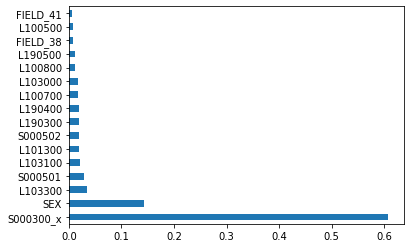

S000300_x    0.606455
SEX          0.143479
L103300      0.034283
S000501      0.029737
L103100      0.021427
L101300      0.019603
S000502      0.018778
L190300      0.018704
L190400      0.018437
L100700      0.017828
L103000      0.016907
L100800      0.011551
dtype: float64
Index(['S000300_x', 'SEX', 'L103300', 'S000501', 'L103100', 'L101300',
       'S000502', 'L190300', 'L190400', 'L100700', 'L103000', 'L100800'],
      dtype='object')


In [28]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(12))
print(feat_importances.nlargest(12).index)

In [29]:
# this function computes vif value which help us to remove columns with redundant information ( to avoid Multicollinearity)
# Multicollinearity occurs when two or more predictors in the model are correlated and provide redundant information about the response.
# Multicollinearity was measured by variance inflation factors (VIF) and tolerance


def vifcal(inputdata, depcol):
    vifL5 = []
    import statsmodels.formula.api as sm

    xvars = inputdata.drop([depcol], axis=1)
    xvarnames = xvars.columns
    for i in range(0, xvarnames.shape[0]):
        _y = xvars[xvarnames[i]]
        _x = xvars[xvarnames.drop(xvarnames[i])]
        rsq = sm.ols(formula="_y~_x", data=xvars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(i, ", ", xvarnames[i], " VIF = ", vif)
        if vif < 5:
            vifL5.append(xvarnames[i])
    return vifL5

In [33]:

newcols = vifcal(
    data2[
        ['S000300_x', 'SEX', 'L103300', 'S000501', 'L103100', 'L101300',
       'S000502', 'L190300', 'L190400', 'L100700', 'L103000', 'L100800','S000300_y'
        ]
    ],
    "S000300_y",
)
print(newcols, len(newcols))

0 ,  S000300_x  VIF =  1.67
1 ,  SEX  VIF =  2.9
2 ,  L103300  VIF =  3.15
3 ,  S000501  VIF =  2.7
4 ,  L103100  VIF =  2.38
5 ,  L101300  VIF =  1.27
6 ,  S000502  VIF =  2.46
7 ,  L190300  VIF =  3.57
8 ,  L190400  VIF =  4.28
9 ,  L100700  VIF =  1.9
10 ,  L103000  VIF =  1.77
11 ,  L100800  VIF =  1.26
['S000300_x', 'SEX', 'L103300', 'S000501', 'L103100', 'L101300', 'S000502', 'L190300', 'L190400', 'L100700', 'L103000', 'L100800'] 12


============================= Backward Elimination
========

In [ ]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['L103000','L103300','L190300','FIELD_40','FIELD_27','FIELD_29','FIELD_21','FIELD_5','FIELD_14'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['FIELD_33'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp.columns